In [1]:
%reset -f
import sys
sys.path.insert(0,'..')
from wavhandler import *
from utils import *
from configs import *
from utils_train import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
print(sns.__version__)
def find_mainwbf(x):
    peaks, _ = find_peaks(x, height=0.0008)
    wbfs = [i for i in peaks if i > 250]
    if len(wbfs):
        return wbfs[0]
    return np.nan

def make_mainWBF_df(psds=None):
    import multiprocessing
    cpus = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cpus)
    result_list = []
    result_list.append(pool.map(find_mainwbf, psds))
    pool.close()
    df = pd.DataFrame(result_list[0], columns=['mainWBF'])
    return df

data = DatasetConfiguration(names=['Wingbeats'])
data.select_all()
data.read()

0.11.0
Dataset - Wingbeats - exists: True


In [2]:
# all_dfs = []
# species = []
# for i, spec in enumerate(data.target_classes):
#     sub = data.df[data.labels == spec]
#     print(f"{spec}: {sub.shape[0]}")
#     mat = make_df_parallel(names = sub.fnames.tolist(), setting='psd').values
#     pd.DataFrame(mat).to_csv(f"{TEMP_DATADIR}/{spec}_matrix.csv")
#     species.append(spec)
#     mat_rows = [mat[i] for i in range(len(mat))]
#     all_dfs.append(make_mainWBF_df(psds=mat_rows))
#     del mat
#     del mat_rows

In [3]:
# dim1,dim2 = 26,4
# plt.figure(figsize=(dim1,dim2))
# ind1,ind2 = 0,1
# df = all_dfs[ind1]
# col = 'mainWBF'
# res=6.
# fs=16
# rot=0
# xlim1, xlim2 = 300, 1000
# ylim1, ylim2 = 0,3000
# values = df[col]
# _bins, _edges = np.histogram(values, np.arange(df[col].min(), df[col].max(), res))
# plt.plot(_edges[:len(_edges)-1], _bins)

# df = all_dfs[ind2]
# values = df[col]
# _bins, _edges = np.histogram(values, np.arange(df[col].min(), df[col].max(), res))
# plt.plot(_edges[:len(_edges)-1], _bins)
# plt.ylabel('counts'); plt.xlabel('')
# plt.xticks(rotation=rot, fontsize=fs);
# plt.yticks(fontsize=fs);
# plt.xlim(xlim1,xlim2)
# plt.ylim(ylim1,ylim2)
# # plt.title(f"{species[ind1]}, {species[ind2]}")
# plt.legend([species[ind1], species[ind2]])
# # plt.show()

# plt.figure(figsize=(dim1,dim2))
# ind1,ind2 = 2,3
# df = all_dfs[ind1]
# col = 'mainWBF'
# values = df[col]
# _bins, _edges = np.histogram(values, np.arange(df[col].min(), df[col].max(), res))
# plt.plot(_edges[:len(_edges)-1], _bins)

# df = all_dfs[ind2]
# col = 'mainWBF'
# values = df[col]
# _bins, _edges = np.histogram(values, np.arange(df[col].min(), df[col].max(), res))
# plt.plot(_edges[:len(_edges)-1], _bins)
# plt.ylabel('counts'); plt.xlabel('')
# plt.xticks(rotation=rot, fontsize=fs);
# plt.yticks(fontsize=fs);
# plt.xlim(xlim1,xlim2)
# plt.ylim(ylim1,ylim2)
# # plt.title(f"{species[ind1]}, {species[ind2]}")
# plt.legend([species[ind1], species[ind2]])
# # plt.show()

# plt.figure(figsize=(dim1,dim2))
# ind1,ind2 = 4,5
# df = all_dfs[ind1]
# values = df[col]
# _bins, _edges = np.histogram(values, np.arange(df[col].min(), df[col].max(), res))
# plt.plot(_edges[:len(_edges)-1], _bins)

# df = all_dfs[ind2]
# values = df[col]
# _bins, _edges = np.histogram(values, np.arange(df[col].min(), df[col].max(), res))
# plt.plot(_edges[:len(_edges)-1], _bins)
# plt.ylabel('counts'); plt.xlabel('')
# plt.xticks(rotation=rot, fontsize=fs);
# plt.yticks(fontsize=fs);
# plt.xlim(xlim1,xlim2)
# plt.ylim(ylim1,7000)
# # plt.title(f"{species[ind1]}, {species[ind2]}")
# plt.legend([species[ind1], species[ind2]])
# plt.show()


In [8]:
all_dfs = pd.read_csv(f"{TEMP_DATADIR}/all_dfs.csv", index_col='Unnamed: 0')

In [48]:
all_dfs.columns = data.target_classes

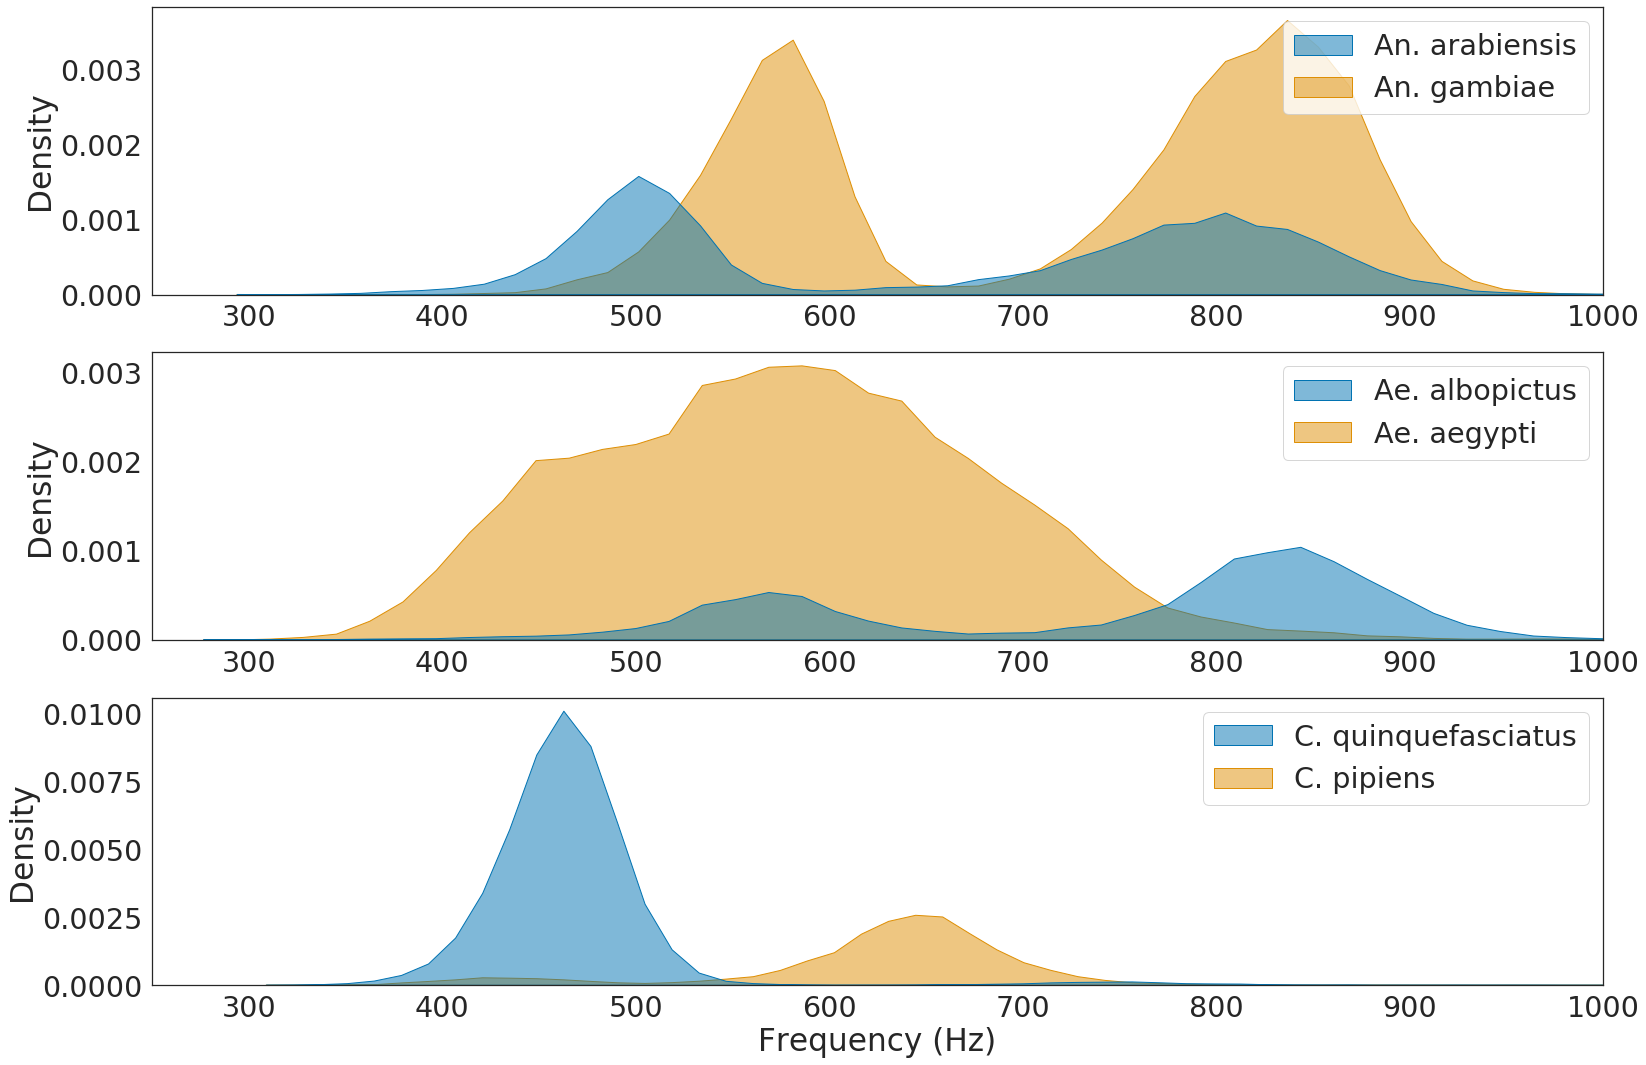

In [86]:
sns.set(font_scale=2.6, style='white')
plt.figure(figsize=(26,18))
plt.subplot(3,1,1)
sns.histplot(all_dfs.iloc[:,:2], stat='density', element='poly', palette=sns.color_palette("colorblind", n_colors=2), bins=100, alpha=.5)
plt.xlim(250,1000)
plt.subplot(3,1,2)
sns.histplot(all_dfs.iloc[:,2:4], stat='density', element='poly', palette=sns.color_palette("colorblind", n_colors=2), bins=100, alpha=.5)
plt.xlim(250,1000)
plt.subplot(3,1,3)
sns.histplot(all_dfs.iloc[:,4:], stat='density', element='poly', palette=sns.color_palette("colorblind", n_colors=2), bins=100, alpha=.5)
plt.xlim(250,1000)
plt.xlabel('Frequency (Hz)')
plt.savefig("/media/kalfasyan/DATADRIVE1/paper1_final/after_reviewer_comments/figures_tables/hists.pdf", bbox_inches='tight', format='pdf')

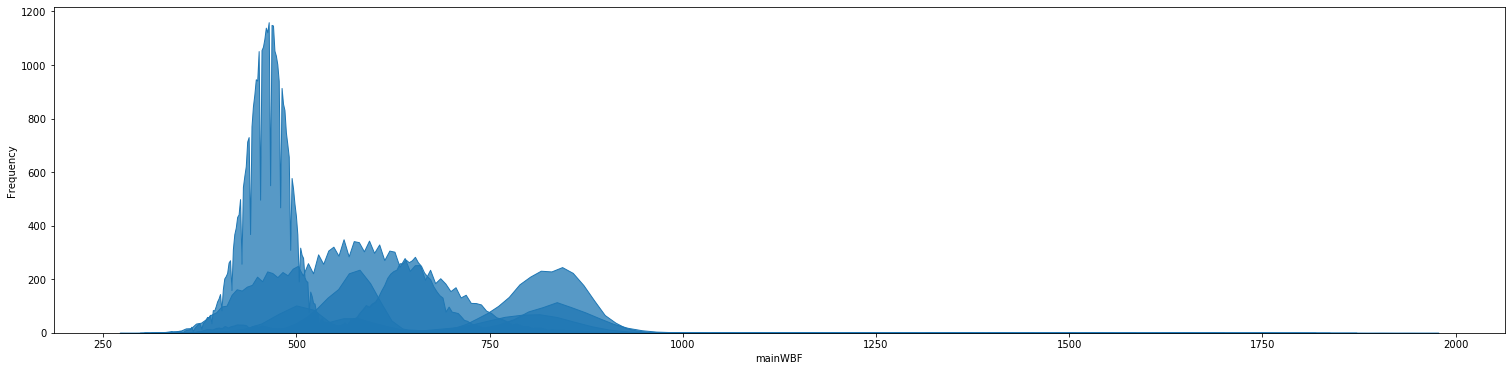

In [27]:
plt.figure(figsize=(26,6))
sns.histplot(all_dfs.iloc[:,0].dropna(), stat='frequency', element='poly')
sns.histplot(all_dfs.iloc[:,1].dropna(), stat='frequency', element='poly')
sns.histplot(all_dfs.iloc[:,2].dropna(), stat='frequency', element='poly')
sns.histplot(all_dfs.iloc[:,3].dropna(), stat='frequency', element='poly')
sns.histplot(all_dfs.iloc[:,4].dropna(), stat='frequency', element='poly')
sns.histplot(all_dfs.iloc[:,5].dropna(), stat='frequency', element='poly')

In [45]:
all_dfs[0]

,mainWBF
0,712.0
1,465.0
2,510.0
3,801.0
4,499.0
...,...
19292,878.0
19293,556.0
19294,552.0
19295,554.0


In [56]:
pd.concat(all_dfs, axis=1).to_csv(f"{TEMP_DATADIR}/all_dfs.csv")

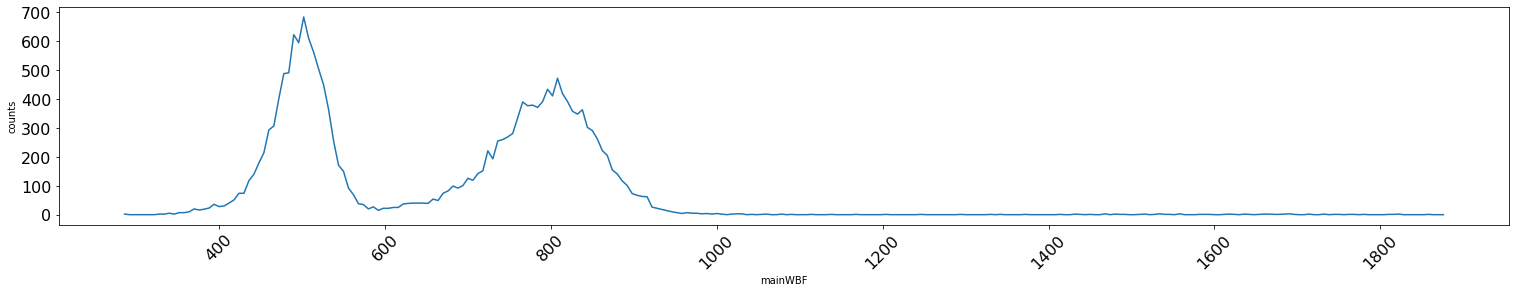

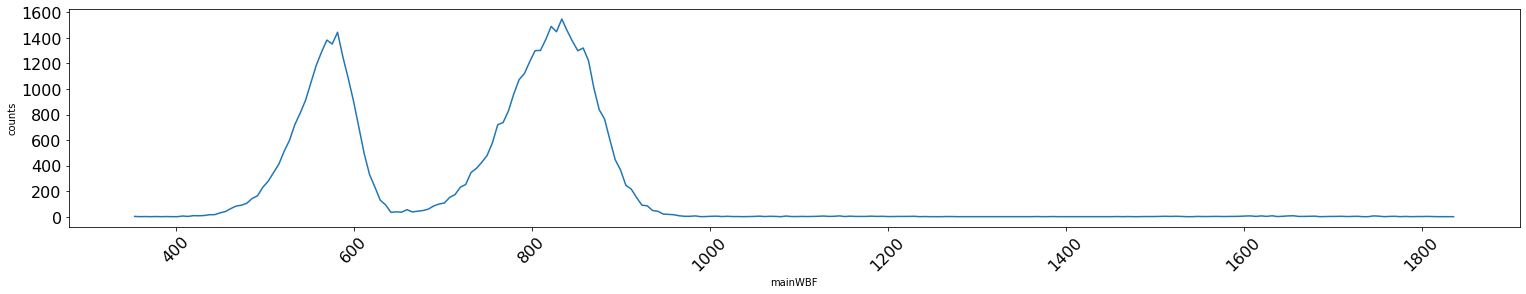

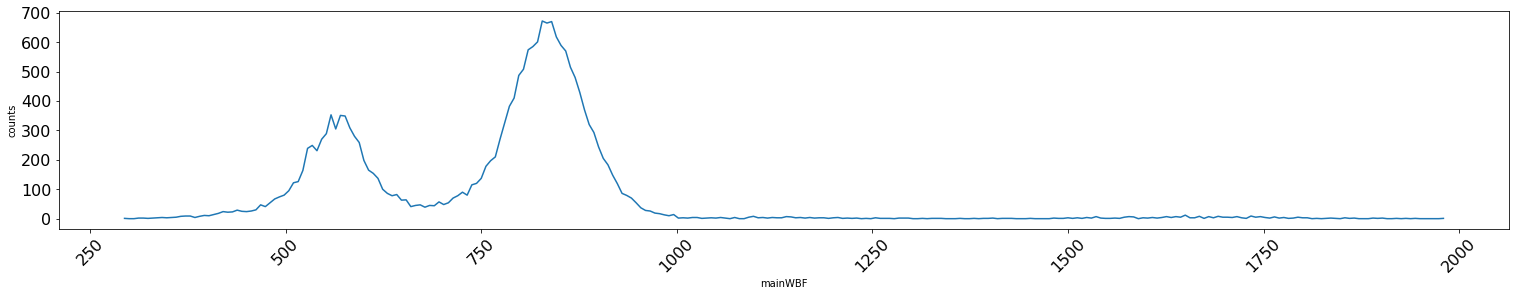

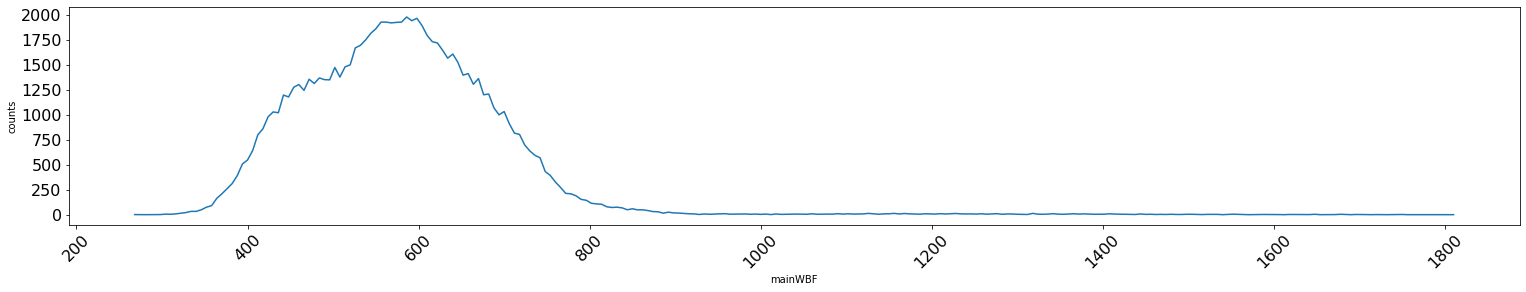

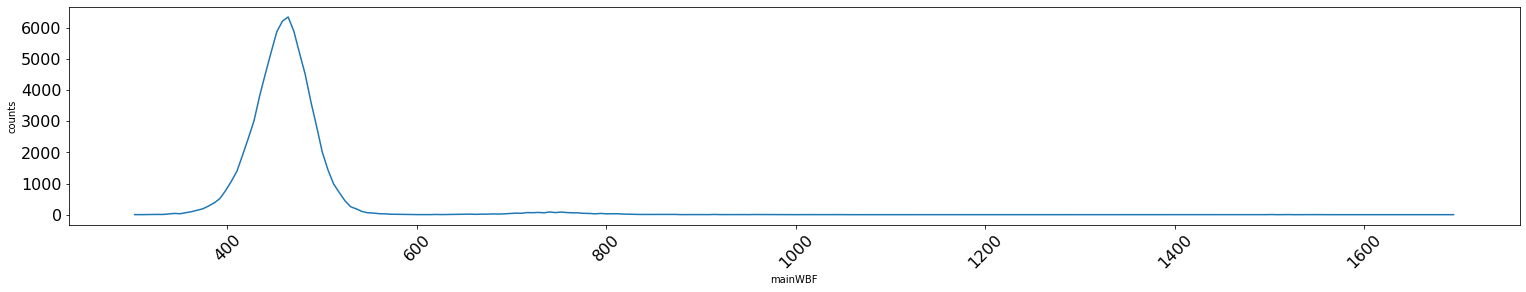

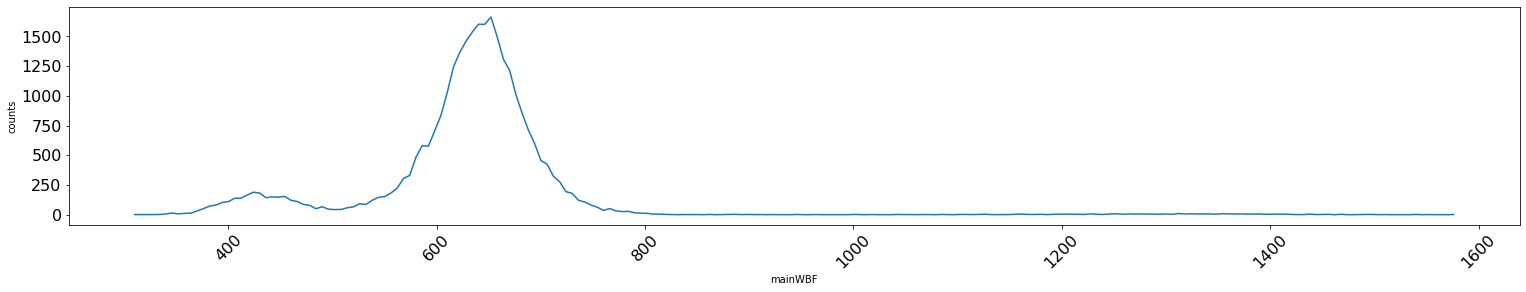

In [13]:
plt.figure(figsize=(26,4))
np_hist(all_dfs[0], col='mainWBF', res=6., fs=16)
plt.figure(figsize=(26,4))
np_hist(all_dfs[1], col='mainWBF', res=6., fs=16)
plt.figure(figsize=(26,4))
np_hist(all_dfs[2], col='mainWBF', res=6., fs=16)
plt.figure(figsize=(26,4))
np_hist(all_dfs[3], col='mainWBF', res=6., fs=16)
plt.figure(figsize=(26,4))
np_hist(all_dfs[4], col='mainWBF', res=6., fs=16)
plt.figure(figsize=(26,4))
np_hist(all_dfs[5], col='mainWBF', res=6., fs=16)

In [11]:
mat_rows

NameError: name 'mat_rows' is not defined

In [ ]:
# rdm = np.random.randint(0,mat.shape[0])
# x = mat[rdm,:]
# plt.plot(x)

    
# mat_rows = [mat[i] for i in range(len(mat))]



In [97]:
mat_rows = [mat[i] for i in range(len(mat))]

def make_df_parallel(psds=None):
    import multiprocessing
    cpus = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cpus)
    result_list = []
    result_list.append(pool.map(find_mainwbf, psds))
    pool.close()
    df = pd.DataFrame(result_list[0], columns=['mainWBF'])
    return df

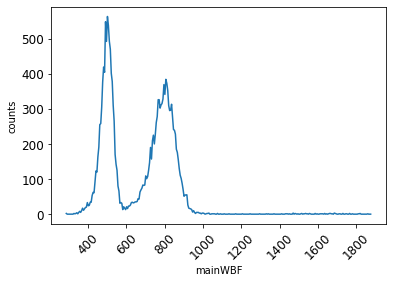

In [61]:
low = 250
high = 3000
medians = pd.read_csv(f"{TEMP_DATADIR}/median_psds_wingbeats.csv", index_col='Unnamed: 0')
means = pd.read_csv(f"{TEMP_DATADIR}/mean_psds_wingbeats.csv", index_col='Unnamed: 0')
medians.index = data.target_classes
means.index = data.target_classes
medians = medians.iloc[:,low:high]
means = means.iloc[:,low:high]
species = data.target_classes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


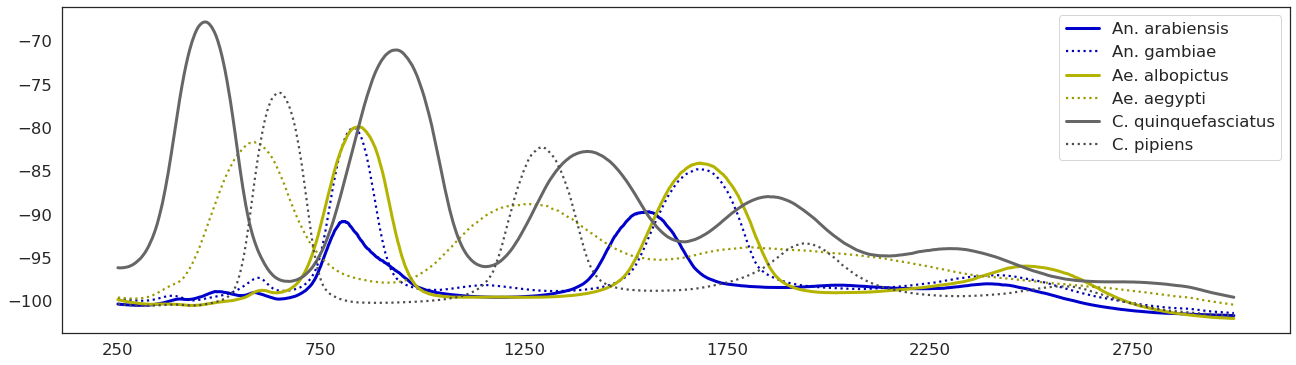

In [65]:
import seaborn as sns
sns.set(font_scale=1.5, style='white')
plt.figure(figsize=(22,6))
c = [(.0,.0,.8),(.0,.0,.7), (.7,.7,0), (.6,.6,0), (.4,.4,.4), (.3,.3,.3)]
for i in range(len(species)):
    if species[i].startswith('An.'):
        style='dotted'
        width=2.2
    elif species[i].startswith('Ae.'):
        style='dotted'#'dotted'
        width=2.2
    else:
        style='dotted'#'dashed'
        width=2.2
    if len(species[i]) >= 14:
        style='solid'
        width=3
    medians.iloc[i,:].plot(linestyle=style, linewidth=width, color=c[i])
plt.legend(species)
plt.savefig('/media/kalfasyan/DATADRIVE1/paper1_final/histogram.eps', bbox_inches='tight')

In [ ]:
sns.set(font_scale=1.5, style='white')
species = data.target_classes
plt.figure(figsize=(26,8))
tmp = medians.iloc[:,300:3000]
tmp.index = species

sns.lineplot(data=tmp.T, palette=sns.color_palette("hls", 6), linewidth=2.5, dashes=[(1,1),(1,1),(2,2),(2,2),(3,3),(3,3)])
# plt.('off')